In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from collections import defaultdict
from scipy.stats import kurtosis, skew
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
input_image = 'Input_images/baboon.jpg'
input_img_width = 640
input_img_height = 640

#database image sizes to make the crop
img_width = 16
img_height = 16

Reading the Input_image from the folder

In [21]:
input_img = cv2.imread(input_image)
input_img = cv2.resize(input_img, (input_img_width,input_img_height), interpolation = cv2.INTER_CUBIC)
input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB) #transform into RGB format
input_img = np.array(input_img).astype('uint8')
input_img.shape

(640, 640, 3)

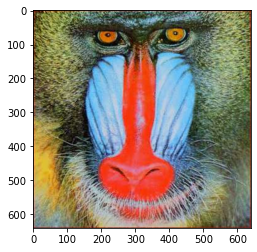

In [22]:
plt.imshow(input_img)
plt.show()

Now that we have the image loaded and in the right size we want to cut it into tiles. We want the tiles to be the same size than the pictures from our Database. img_height, img_width, number of channels. (16X16X3)

To achieve this we select the height of the tiles and we loop over the width of the input image with steps the width of the tile. All of this while storing each tile into a list.
we have to repeat this process for the whole height of the input image and for every channel. 

with this process tile[0] (our first tile) will be the tile in the upper-left most corner.


In [74]:
tiles = []
for x in range(0, input_img_height,img_height): #we loop over the height of our tiles
    for y in range(0, input_img_width, img_width): # we loop over the width of our tiles
    
            tile = input_img[x:x+img_height,y:y+img_width,0:3] # we run the loop and cut within the 3 channels
            #we append each tile into the created list
            tiles.append(tile)

# our tile[0] is the tile in the upper-left side of our image

In [75]:
type(tiles[0])

numpy.ndarray

In [77]:
# let us check the shape of our tiles
tiles[0].shape

(16, 16, 3)

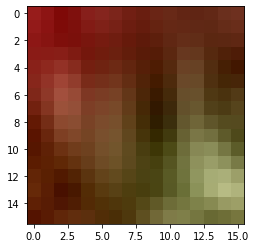

In [80]:
#let us have a visual og the tile
plt.imshow(tiles[0])
plt.show()

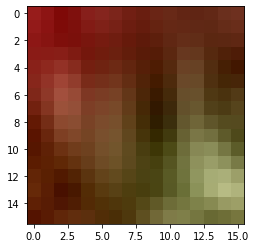

In [65]:
#we can compare the visual with the direct crop of the image. 
plt.imshow(input_img[0:16,0:16,0:3])
plt.show()

Both tiles seem to be the same. However, let us compare them numerically to make sure they are identical. 
We start by getting a boolean array for each pixel and we compute the sum to see if it is equal to the total size of the image. 

In [81]:
#get the boolean array
check = tiles[0] == input_img[0:16, 0:16, 0:3]
# compute the sum: we are expecting as a result 768 = 16*16*3
check.sum()

768

Both tiles are equal!!!